#Clasificador de tejido sano y tejido cancerígeno en imágenes microscópicas del esófago

##Paso 1: Cargar librerías y módulos requeridos

In [1]:
import random        #Módulo para aleatorizar
import pickle        #Módulo para respaldar objetos de Pyhton como cadenas de bytes (serialización de objetos)

import numpy as np   #Biblioteca para manejar matrices y operaciones de matrices
import pandas as pd  #Biblioteca para manejar tablas de datos

#Funciones de la biblioteca Scikit-image para leer y mostrar una una imagen
from skimage.io import imshow, imread

#Sklearn (Scikit-learn) es la principal biblioteca para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

#Bibliotecas para gráficar y visualizar
import matplotlib.pyplot as plt
import seaborn as sns

##Paso 2: Cargar datos y su lectura



###2.1: Etiquetas $y$

In [2]:
#Lectura de los datos con Pandas

datos=pd.read_csv("https://raw.githubusercontent.com/ElAleph25/Projectos-del-Portafolio-/main/Perceptr%C3%B3nLineal/ClasesImagenes.csv", usecols=[1,2])


In [ ]:
type(datos)

pandas.core.frame.DataFrame

In [3]:
#Mostremos los primeros cinco registros
datos.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [ ]:
#¿Con cuántas imagenes vamos a trabajar?
datos.shape[0]

5063

In [ ]:
# ¿Cuántas imagenes hay en cada clase?
datos['class_number'].value_counts(sort=False)

,count
class_number,
0,1469
1,3594


La Clase 0 corresponde al tejido sano; la Clase 1 corresponde al tejido Cancerígeno.

In [ ]:
#Se guardarán las etiquetas de las imagenes como Series de Pandas
y = datos['class_number']

###2.2: Imágenes $X$

Por comodidad, el archivo [CarpetaImagenes.zip](https://drive.google.com/file/d/1Abi4hjl5djn8X75YCcMXL5htq7iqf7VY/view), debe cargarse en Google Drive.

Una vez hecho, hay que descomprimir el archivo zip que guardamos en nuestro Drive.

La notación $X$ simboliza que las imágenes serán las features o características del DataSet.

In [ ]:
!unzip -u "/content/drive/MyDrive/DataSets/CarpetaImagenes.zip" -d "/content/drive/MyDrive/DataSets/Unzip/"


Archive:  /content/drive/MyDrive/DataSets/CarpetaImagenes.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Nombres de las imágenes
datos['image_filename'].head()

,image_filename
0,im_4_0.png
1,im_21_0.png
2,im_9_0.png
3,im_8_0.png
4,im_15_0.png


Vamos a visualizar la primera imagen. Para ello, además del nombre de la imagen, necesitamos añadir la ruta del directorio en donde se encuentra dicha imagen.

In [ ]:
nombre_archivo = 'im_4_0.png'

ruta = '/content/drive/MyDrive/DataSets/Unzip/'

imagen = imread(ruta  + nombre_archivo, as_gray=True)

In [ ]:
#¿Qué tipo de objeto es la variable "imagen"?
type(imagen)

numpy.ndarray

In [ ]:
#¿Qué dimensiones tiene?
imagen.shape

(260, 260)

In [ ]:
#Exploremos el nivel de coloración de algunos de los pixeles de esta imagen
imagen[72:80, 170:190]

array([[0.29998118, 0.29998118, 0.30278667, 0.30504157, 0.30784706,
        0.30784706, 0.30784706, 0.31262471, 0.3154302 , 0.32246275,
        0.32246275, 0.32526824, 0.32526824, 0.33032863, 0.33988392,
        0.34185608, 0.34466157, 0.34972196, 0.35169412, 0.34691647],
       [0.27947176, 0.28227725, 0.28424941, 0.29014314, 0.29211529,
        0.29211529, 0.29520353, 0.29717569, 0.29998118, 0.30278667,
        0.30278667, 0.30504157, 0.30504157, 0.31262471, 0.32049059,
        0.32526824, 0.33032863, 0.33230078, 0.33032863, 0.33032863],
       [0.26654549, 0.26654549, 0.27215647, 0.27721686, 0.27947176,
        0.28424941, 0.28424941, 0.29014314, 0.29014314, 0.29014314,
        0.29014314, 0.29211529, 0.29520353, 0.29717569, 0.29998118,
        0.30784706, 0.3154302 , 0.3176851 , 0.32049059, 0.3154302 ],
       [0.2614851 , 0.2614851 , 0.26345725, 0.26345725, 0.27215647,
        0.27721686, 0.27721686, 0.27947176, 0.27947176, 0.27721686,
        0.27721686, 0.27947176, 0.28227725, 0

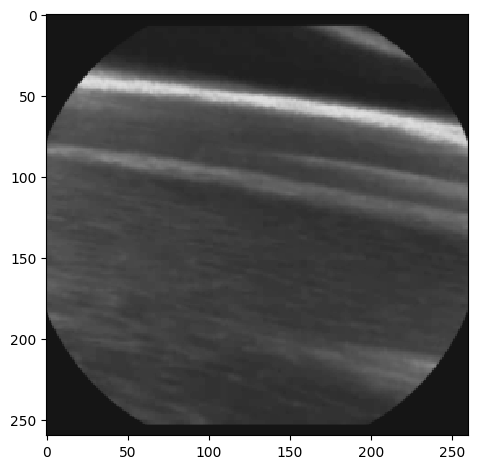

In [ ]:
imshow(imagen)

Ahora vamos a hacer lo mismo para las demás imágenes

In [ ]:
datos['image_filename']

,image_filename
0,im_4_0.png
1,im_21_0.png
2,im_9_0.png
3,im_8_0.png
4,im_15_0.png
...,...
5058,im_114_55.png
5059,im_7_55.png
5060,im_52_55.png
5061,im_10_55.png


In [ ]:
%time  img = datos['image_filename'].apply(lambda x: imread(ruta + x, as_gray=True))

CPU times: user 54.7 s, sys: 24.8 s, total: 1min 19s
Wall time: 1min 44s


Hay que respaldar el objeto $\textit{img}$ en un archivo pickle.

Referencias: https://programacion.net/articulo/los_pickles_de_python_1860




In [ ]:
#Guardamos en archivo pickle
ruta2 = '/content/drive/MyDrive/DataSets/' #Directorio donde se guardará el
pickle.dump(img, open (ruta2 + "imagenes_numpy.pkl", 'wb'))

In [ ]:
#Leemos el archivo pickle
ruta2 = '/content/drive/MyDrive/DataSets/'
img = pickle.load(open(ruta2 + "imagenes_numpy.pkl", 'rb'))

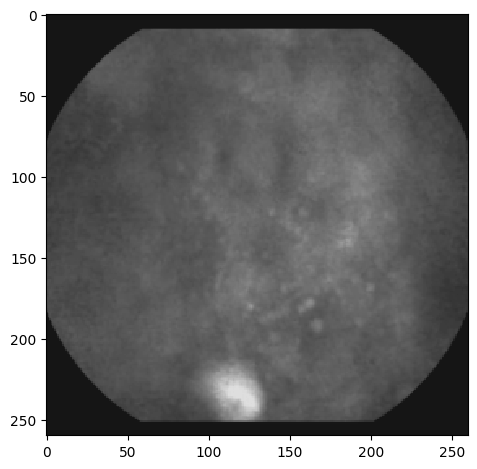

In [ ]:
imshow(img[47])

- Dimensión 0: 260 renglones de pixeles de arriba a abajo
- Dimensión 1: 260 columnas de pixeles de izquierda a derecha


##Paso 3: Preprocesamiento de datos - Transformar imágenes en vectores

In [ ]:
type(img)

pandas.core.series.Series

In [ ]:
#Cantidad de elementos en la serie
img.shape

(5063,)

In [ ]:
#Cada elemento de la secuencia es una matriz de 260 x 260
img[5000].shape

(260, 260)

###3.1: Transformar la secuencia de matrices $\textit{img}$ en una sola matriz

In [ ]:
IMG = np.stack(img, axis=0)#Toma una secuencia de matrices y las apila a lo largo de un tercer eje para hacer una solo arreglo
IMG.shape

(5063, 260, 260)

###3.2: Aplanar la matriz  2D (260x260 pixeles) de cada imagen, para obtener un vector por imagen

In [ ]:
X = IMG.reshape(5063, 67600)
X.shape

(5063, 67600)

##Paso 4: Visualización de ambas clases de imagenes

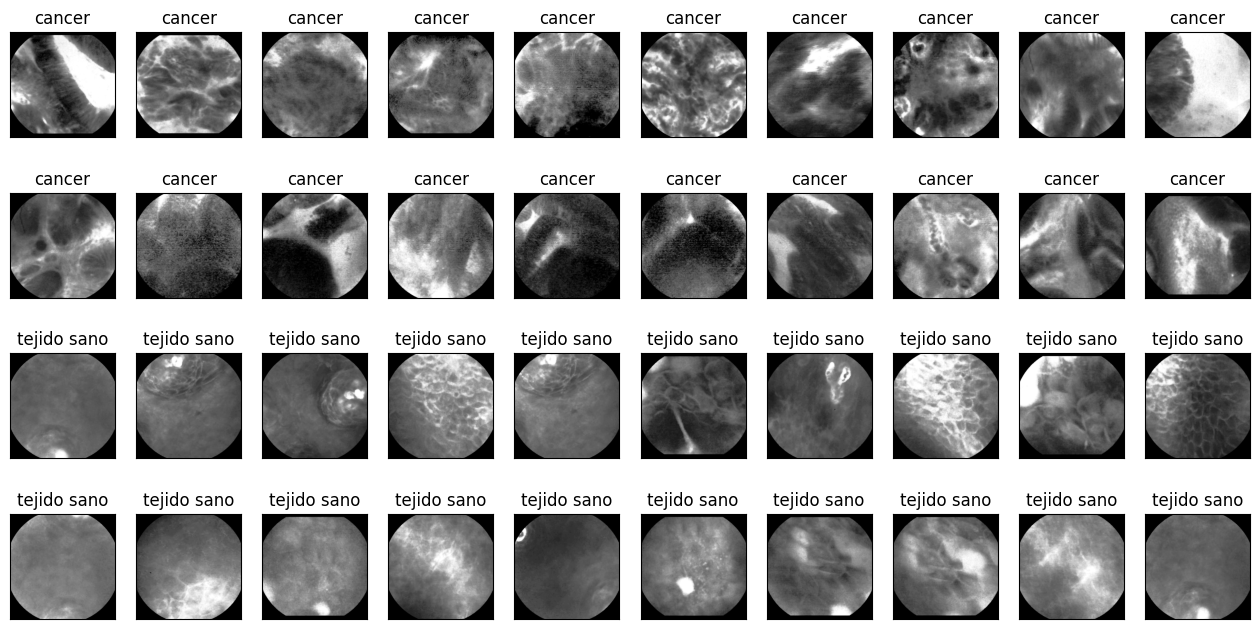

In [ ]:
#Con el método GroupBy de Pandas, separamos el data frame en dos, de acuerdo
#a su etiqueta
porClase = datos.groupby('class_number')

#Elijimos al azar n muestras de cada subconjunto y guardamos la posición de las
#imagenes cancerigenas en la lista "c" y en  "s" las de tejido sano
n = 20
c = random.sample(porClase.get_group(1).index.tolist(), n)
s = random.sample(porClase.get_group(0).index.tolist(), n)


#Se crea el espacio para las 40 imagenes que vamos a desplegar
fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4

#Desplegamos las imagenes
for i in range(0, 40):
    fig.add_subplot( rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('tejido sano')
        plt.xticks([])
        plt.yticks([])
plt.show()

##Paso 5: Construcción de nuestro clasificador de imágenes

El $\textit{Perceptrón}$ es un algoritmo que construye una red neuronal de una sola
capa y tantos nodos como cualidades o características tengan nuestros DataSets.


###3.1: Crear subconjuntos de entrenamiento y prueba


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
#¿Cómo se ven los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Tejido Sano:        ', counts[0],'\nDisplasia o Cáncer: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Tejido Sano:         ', counts[0],'\nDisplasia o Cáncer: ', counts[1],'\n')

Training set
X:  (3544, 67600)
y:  (3544,)
Tejido Sano:         1043 
Displasia o Cáncer:  2501 

Test set
X:  (1519, 67600)
y:  (1519,)
Tejido Sano:          426 
Displasia o Cáncer:  1093 



###3.2: Entrenamiento

Sea $S$ un DataSet con $N$ registros y $d$ características. Decimos que $S$ es $\textit{separable}$ por una función lineal, si existe un hiperplano $H\subset\mathbb R^d$
tal que, de un lado de este
hiperplano están todos los puntos clasificados con 1, y del otro lado estarán
todos aquellos clasificados con 0. El algoritmo del Perceptrón, da los coeficientes $\beta_i$ para construir al hiperplano $H$ solo conociendo $S$.

In [ ]:
model = Perceptron(max_iter=1000, random_state=0, verbose=False)
model.fit(X_train, y_train)

print("Iteraciones: ", model.n_iter_)

Iteraciones:  44


In [ ]:
#Guardamos los coeficientes del modelo
betas = model.coef_
betas.shape

(1, 67600)

In [ ]:
beta0 = model.intercept_
beta0

array([-42.])

In [ ]:
betas[0, 50310:50320]

array([ -1.92002706,  26.43550275,  48.33832196,  60.5412651 ,
        36.79920392,  20.46658157,  -2.35208118, -16.18895686,
       -16.80207686,   4.81493412])

###3.3: Predicción

In [ ]:
y_predict = model.predict(X_test)  # Clasifica cada imagen del X_test
y_predict[:20]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

###3.4: Evaluación

In [ ]:
y_test.to_numpy()[:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
print("Exactitud del conjunto entrenamiento: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Exactitud del conjunto prueba: %.2f%%" % (model.score(X_test, y_test)*100.0))

Exactitud del conjunto entrenamiento: 95.49%
Exactitud del conjunto prueba: 90.19%


In [ ]:
#Data Frame etiqueta real vs etiqueta predicción
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }
df = pd.DataFrame(data)
df

,Y_Real,Y_Prediccion
3284,0,0
142,1,1
2625,1,1
2066,1,1
72,0,1
...,...,...
1569,1,1
5057,1,1
1422,0,0
2044,1,1


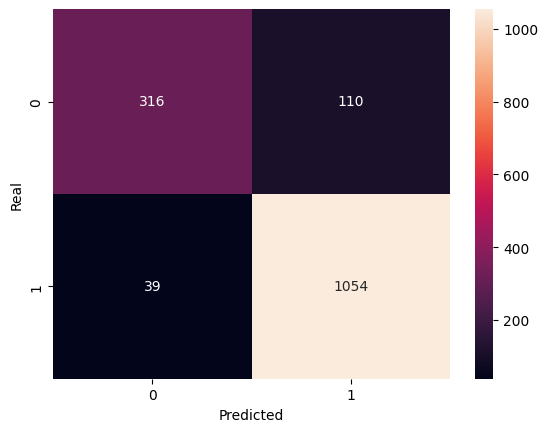

In [ ]:
#Matriz de confusión

confusion_matrix = pd.crosstab(df['Y_Real'],
                               df['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Predicted'])
confusion_matrix
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

##Paso 6: Entrenamiento del perceptrón utilizando margen

In [ ]:
model2 = Perceptron(max_iter=1000,
                    random_state=0,
                    verbose=False,
                    penalty='l2',
                    alpha=0.0001)
model2.fit(X_train,y_train)

print("Exactitud conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))


Exactitud conjunto entrenamiento: 77.48%
Exactitud conjunto prueba: 77.49%


In [ ]:
model3 = Perceptron(max_iter=1000,
                    random_state=0,
                    verbose=False,
                    penalty='l2',
                    alpha=0.000005)
model3.fit(X_train,y_train)

print("Exactitud conjunto entrenamiento: %.2f%%" % (model3.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model3.score(X_test,
                                                          y_test)*100.0))

Exactitud conjunto entrenamiento: 94.38%
Exactitud conjunto prueba: 90.06%


In [ ]:
model4 = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001)
model4.fit(X_train,y_train)

print("Exactitud conjunto entrenamiento: %.2f%%" % (model4.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model4.score(X_test, y_test)*100.0))

Exactitud conjunto entrenamiento: 98.59%
Exactitud conjunto prueba: 92.03%
